In [1]:
import numpy as np
import pandas as pd
import sys
!{sys.executable} -m pip install torch torchvision
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
Transform = torchvision.transforms.Compose([torchvision.transforms.Grayscale(num_output_channels=1),torchvision.transforms.ToTensor()])
trainingdata = torchvision.datasets.CIFAR10('./CIFAR10/', train = True, download=True, transform=Transform)
testingdata = torchvision.datasets.CIFAR10('./CIFAR10/', train = False, download=True, transform=Transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
image, label = trainingdata[0]
arr = image.numpy()
inputs = list(arr.shape)
output_size = 10
input_size = 1*32*32
# for elem in inputs:
#     input_size += input_size*elem
print(inputs, label, input_size, output_size)

[1, 32, 32] 6 1024 10


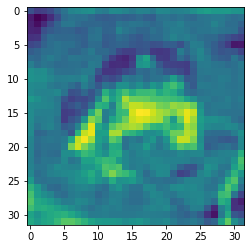

In [4]:
%matplotlib inline
plt.imshow(image.squeeze().numpy())
plt.show()

In [5]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testingdata,batch_size=64,shuffle=False)

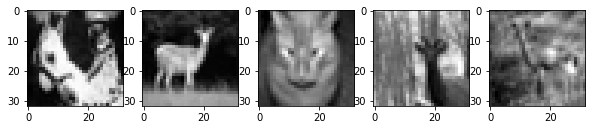

In [6]:
images, labels = iter(trainDataLoader).next()

plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)

In [7]:
class CIFAR10(torch.nn.Module):
    def __init__(self):
        super(CIFAR10, self).__init__()
        self.l1 = torch.nn.Linear(input_size, 256)
        self.l2 = torch.nn.Linear(256, 128)
        self.l3 = torch.nn.Linear(128, 64)
        self.l4 = torch.nn.Linear(64, output_size)
        
    def forward(self, x):
        out_x = x.view(x.size(0), -1)
        out_x = self.l1(out_x)
        out_x = F.relu(out_x)
        out_x = self.l2(out_x)
        out_x = F.relu(out_x)
        out_x = self.l3(out_x)
        out_x = F.relu(out_x)
        out_x = self.l4(out_x)
#         out_x = F.relu(out_x)
        return out_x

net = CIFAR10()
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)

In [8]:
train_loss_history = []
test_loss_history = []
test_accuracy = []

for epoch in range(30):
    train_loss = 0.0
    test_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainDataLoader):
        images, labels = data
#         images = images.cuda()
#         labels = labels.cuda()
        optimizer.zero_grad()
        predicted_output = net(images)
        fit = loss(predicted_output,labels)
        fit.backward()
        optimizer.step()
        train_loss += fit.item()
    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            images, labels = data
#                 images = images.cuda()
#                 labels = labels.cuda()
            predicted_output = net(images)
            fit = loss(predicted_output,labels)
            test_loss += fit.item()
    train_loss = train_loss/len(trainDataLoader)
    test_loss = test_loss/len(testDataLoader)
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 3.424653644756893, Test loss 3.3111496973948875
Epoch 1, Train loss 3.268280443632999, Test loss 3.079309616878534
Epoch 2, Train loss 3.0468386765331257, Test loss 3.022230409512854
Epoch 3, Train loss 3.009879039681476, Test loss 2.9962322924547133
Epoch 4, Train loss 2.9870924586835117, Test loss 2.984961892389188
Epoch 5, Train loss 2.969335678593277, Test loss 2.9718058413001383
Epoch 6, Train loss 2.951020523715202, Test loss 2.945237950914225
Epoch 7, Train loss 2.930887020457431, Test loss 2.9343030877933383
Epoch 8, Train loss 2.9115799976431807, Test loss 2.9142114463125823
Epoch 9, Train loss 2.893844009665272, Test loss 2.9048246471745194
Epoch 10, Train loss 2.8767290606218228, Test loss 2.880576206620332
Epoch 11, Train loss 2.861055328717927, Test loss 2.8715146787606987
Epoch 12, Train loss 2.846392863851679, Test loss 2.837128373467998
Epoch 13, Train loss 2.748186054132174, Test loss 2.628864172917263
Epoch 14, Train loss 2.6128553790814433, Test l

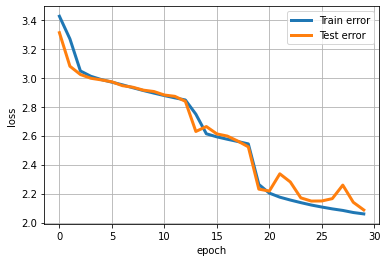

In [9]:
plt.plot(range(30),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(30),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [10]:
print("Accuracy: ",
 (torch.eq(torch.max(predicted_output, 1)
 [1],labels).sum()/len(labels)*100).data.cpu().numpy())

Accuracy:  56.25
